In [1]:
import pandas as pd
data = pd.read_csv('Data/collected_data.csv')
print(data.shape)
data.head()

(458197, 3)


,id,text,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [2]:
data['dialect'].value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

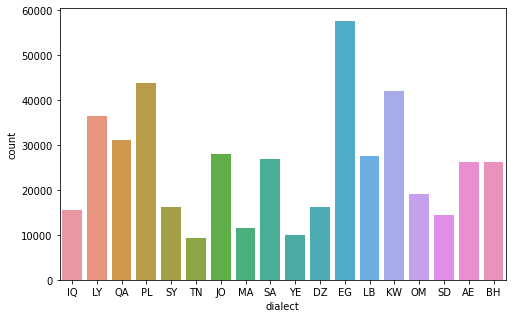

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot(data):
    plt.figure(figsize=(8,5))
    sns.countplot(x = data['dialect'], data=data)

plot(data)

In [4]:
# (Egyptian)  EG ==> EG
eg_data = data[data['dialect'] == 'EG']
eg_data.shape

(57636, 3)

In [5]:
# (Magharbi)  MA ==> TN - LY - DZ - MA
tn_data = data[data['dialect'] == 'TN']
ly_data = data[data['dialect'] == 'LY']
dz_data = data[data['dialect'] == 'DZ']
ma_data = data[data['dialect'] == 'MA']
mg_data = pd.concat([tn_data, ly_data, dz_data, ma_data], axis=0, join='inner')
dict = { 'TN':'MG', 'LY':'MG', 'DZ':'MG', 'MA':'MG'}
mg_data.dialect = data.dialect.map(dict)
mg_data.shape

(73467, 3)

In [6]:
# (gulf)      GU ==> BH - QA - KW - OM - AE - SA - IQ
bh_data = data[data['dialect'] == 'BH']
qa_data = data[data['dialect'] == 'QA']
kw_data = data[data['dialect'] == 'KW']
om_data = data[data['dialect'] == 'OM']
ae_data = data[data['dialect'] == 'AE']
sa_data = data[data['dialect'] == 'SA']

gu_data = pd.concat([bh_data, qa_data, kw_data, om_data, ae_data, sa_data], axis=0, join='inner')
dict = { 'BH':'GU', 'QA':'GU', 'KW':'GU', 'OM':'GU', 'AE':'GU', 'SA':'GU'}
gu_data.dialect = data.dialect.map(dict)
gu_data.shape

(171714, 3)

In [7]:
# (Levantine) LE ==> JO - LB - PL - SY 
jo_data = data[data['dialect'] == 'JO']
lb_data = data[data['dialect'] == 'LB']
pl_data = data[data['dialect'] == 'PL']
sy_data = data[data['dialect'] == 'SY']
le_data = pd.concat([jo_data, lb_data, pl_data, sy_data], axis=0, join='inner')
dict = { 'JO':'LE', 'LB':'LE', 'PL':'LE', 'SY':'LE'}
le_data.dialect = data.dialect.map(dict)
le_data.shape

(115522, 3)

In [8]:
# (Others) TH ==> SD - IQ - YE
iq_data = data[data['dialect'] == 'IQ']
sd_data = data[data['dialect'] == 'SD']
ye_data = data[data['dialect'] == 'YE']
th_data = pd.concat([iq_data, sd_data, ye_data], axis=0, join='inner')
dict = { 'SD':'TH', 'IQ':'TH', 'YE':'GU'}
th_data.dialect = data.dialect.map(dict)
th_data.shape

(39858, 3)

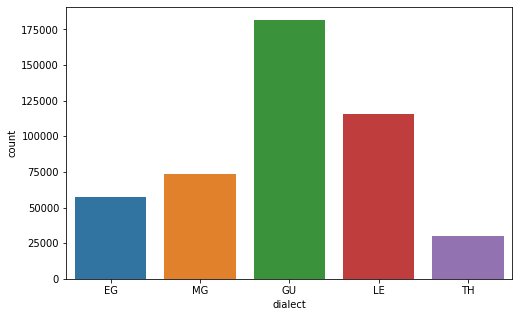

In [9]:
df = pd.concat([eg_data, mg_data, gu_data, le_data, th_data], axis=0, join='inner')
df.shape
plot(df)

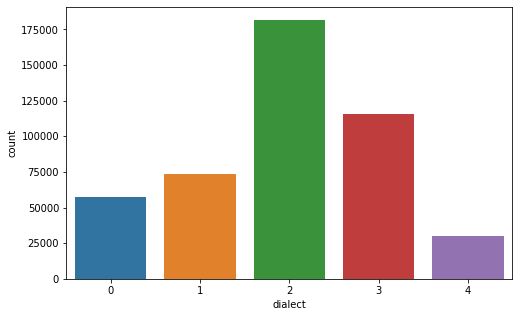

In [10]:
dict = { 'EG':0, 'MG':1, 'GU':2, 'LE':3, 'TH':4}
df.dialect = df.dialect.map(dict)
plot(df)

In [11]:
# Normalizing similar characters
# Removing tashkeel
# Normalizing mentions and links
# Removing unnecessary or repeated punctuation or characters

import re
from tashaphyne import normalize

def cleaning(text): 
    newtext = re.sub('([@A-Za-z0-9_])|[^\w\s]|#|http\S+|', '', text).replace('\n',' ').lstrip().rstrip()
    return re.sub(r'(.)\1+', r'\1', newtext)

def preprocessing_text(text):
    text = normalize.normalize_searchtext(text)
    return cleaning(text)

In [12]:
# input         ==> text = u'أنا إسَمى أنطـًــــــــــــــــونيوس https://www.facebook.com ملاااااااااااااااااك وديع@vvvv www.google.com'
# preprocessing ==> preprocessing_text(text)
# output        ==>'انا اسمي انطونيوس ملاك وديع'

In [13]:
df['processed_text'] =  df['text'].apply(preprocessing_text)
df.head() 

,id,text,dialect,processed_text
244697,1130199209695744000,الاقيش معاك 25 الف يا عم نجيب قرض حسن ابدا بيه...,0,الاقيش معاك الف يا عم نجيب قرض حسن ابدا بيهم ح...
244698,1137520472420233216,@khbondok4 وهو انت لو بتفهم كنت بقيت زملكاوي ؟!,0,وهو انت لو بتفهم كنت بقيت زملكاوي
244699,1137717993172033536,@aelnagar5 @khbondok4 ولولوا عليك ساعة وسكتوا,0,ولولوا عليك ساعه وسكتوا
244700,1137810705514684416,@aelnagar5 @Lokareta2 لا ساعة واحدة عشان بواب ...,0,لا ساعه واحده عشان بواب ملكش عازه
244701,1125394999997284352,@TurkiHAlhamad1 جنسيتك ايه ؟\nده انت لو صهيوني...,0,جنسيتك ايه ده انت لو صهيوني مش هتقول كده


In [14]:
df.to_csv('Data/processed_data.csv', index=False)

In [15]:
dataset = pd.read_csv('Data/processed_data.csv')
dataset.shape

(458197, 4)

In [16]:
texts = list(dataset['processed_text'])
id = list(dataset['id'])
ids = list()
for i in range(len(texts)):
    text = texts[i]
    if type(text)==float:
        ids.append(id[i])
    elif len(text)==0:
        ids.append(id[i])

print(len(ids))

1


In [17]:
ids

[1173616403557081088]

In [18]:
dataset = dataset[dataset['id'] != 1173616403557081088]
dataset.shape

(458196, 4)

In [19]:
dataset.to_csv('Data/processed_data.csv', index=False)